In [84]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns 


In [85]:

SEED = 42 
TARGET_LABEL = 'median_house_value'

## Data Preparation

In [86]:
df = pd.read_csv('../data/housing.csv')
select_columns = ['latitude',
'longitude',
'housing_median_age',
'total_rooms',
'total_bedrooms',
'population',
'households',
'median_income',
'median_house_value']
df = df[select_columns]
df.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [87]:
df.index.size

20640

## EDA

In [88]:
df.dtypes

latitude              float64
longitude             float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
dtype: object

In [89]:
df.describe(include='all').round(2)

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.00,20640.00,20640.00,20640.00,20433.00,20640.00,20640.00,20640.00,20640.00
mean,35.63,-119.57,28.64,2635.76,537.87,1425.48,499.54,3.87,206855.82
std,2.14,2.00,12.59,2181.62,421.39,1132.46,382.33,1.90,115395.62
min,32.54,-124.35,1.00,2.00,1.00,3.00,1.00,0.50,14999.00
25%,33.93,-121.80,18.00,1447.75,296.00,787.00,280.00,2.56,119600.00
50%,34.26,-118.49,29.00,2127.00,435.00,1166.00,409.00,3.53,179700.00
75%,37.71,-118.01,37.00,3148.00,647.00,1725.00,605.00,4.74,264725.00
max,41.95,-114.31,52.00,39320.00,6445.00,35682.00,6082.00,15.00,500001.00


In [90]:
df.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

### Fill Nullable values

In [91]:
# df.total_bedrooms.fillna(df.total_bedrooms.median(),inplace=True)
# df.isnull().sum()

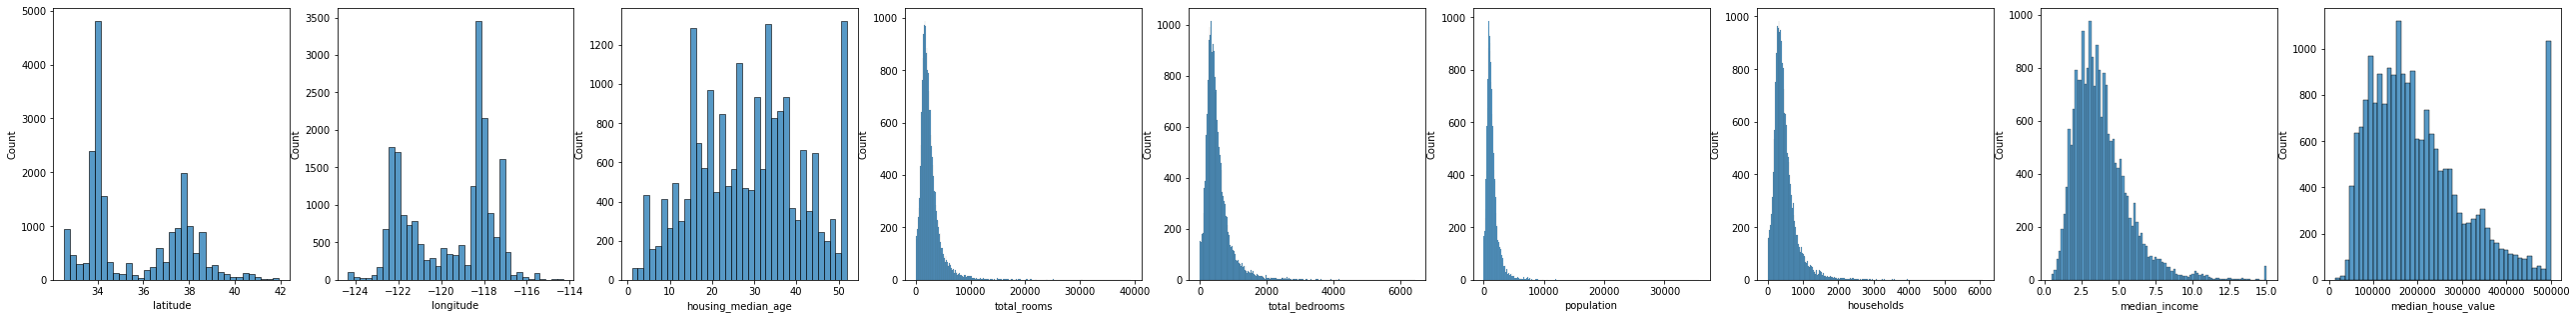

In [92]:
number_columns = df.select_dtypes(include='number').columns
fig, axs = plt.subplots(nrows=1, ncols=len(number_columns), figsize=(5*len(number_columns), 5))
for col_idx in range(len(number_columns)):
    sns.histplot(df[number_columns[col_idx]], ax=axs[col_idx])
plt.show()

In [93]:
for col in df.columns:
    print(col)
    print(df[col]

SyntaxError: unexpected EOF while parsing (858540656.py, line 3)

## Setting Up The Validation Framework 

In [ ]:
n = df.index.size
n_val = n_test = int(n * .2)
n_train = n - n_val - n_test
n, n_train, n_test, n_val, n == n_train + n_val + n_test

(20640, 12384, 4128, 4128, True)

In [ ]:
# split original dataset into 3-th parts: train, validation & test
idx = list(range(n))
np.random.seed(SEED)
np.random.shuffle(idx)
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train + n_val]]
df_test = df.iloc[idx[n_train + n_test:]]

# check number of values
print(f'{len(df)}, {len(df_train) == n_train=}, {len(df_val) == n_val=}, {len(df_test) == n_test=}')

# save index into new column
for _df in [df_train, df_val, df_test]:
    _df.reset_index(inplace=True)
    print()
    print(_df.head().iloc[:,:5])

20640, len(df_train) == n_train=True, len(df_val) == n_val=True, len(df_test) == n_test=True

   index  latitude  longitude  housing_median_age  total_rooms
0  11020     33.83    -117.81                 8.0       7326.0
1   5919     34.28    -118.44                38.0       1156.0
2   6050     34.03    -117.74                27.0       3623.0
3   9627     37.21    -120.24                31.0       2447.0
4   6554     34.17    -118.07                35.0       2142.0

   index  latitude  longitude  housing_median_age  total_rooms
0   9377     37.92    -122.49                26.0       2170.0
1   7808     33.89    -118.10                34.0       2242.0
2  14869     32.63    -117.09                27.0       2920.0
3   4095     34.15    -118.40                44.0       2515.0
4   3460     34.31    -118.45                 9.0       1739.0

   index  latitude  longitude  housing_median_age  total_rooms
0    398     37.89    -122.29                52.0        979.0
1   5376     34.04    

In [ ]:
# extract `target` from each parts of dataset as logarithmic scale
y_train = np.log1p(df_train .pop(TARGET_LABEL))
y_val = np.log1p(df_val .pop(TARGET_LABEL))
y_test = np.log1p(df_test .pop(TARGET_LABEL))

In [ ]:
print(len(y_train), y_train[:5].values, df_train.columns.values, '\n')
print(len(y_val), y_val[:5].values, df_val.columns.values, '\n')
print(len(y_test), y_test[:5].values, df_test.columns.values, '\n')

12384 [13.07548349 11.82847316 11.7223838  11.4489308  12.69465573] ['index' 'latitude' 'longitude' 'housing_median_age' 'total_rooms'
 'total_bedrooms' 'population' 'households' 'median_income'] 

4128 [12.86411324 12.13135449 11.11989769 12.83334975 12.11451093] ['index' 'latitude' 'longitude' 'housing_median_age' 'total_rooms'
 'total_bedrooms' 'population' 'households' 'median_income'] 

4128 [12.50840069 12.73787961 11.79811193 12.51649787 12.94991532] ['index' 'latitude' 'longitude' 'housing_median_age' 'total_rooms'
 'total_bedrooms' 'population' 'households' 'median_income'] 



<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

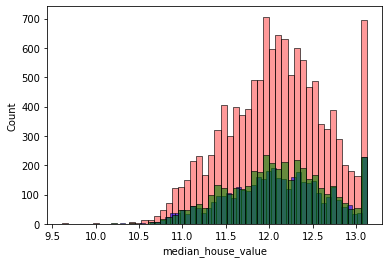

In [ ]:
sns.histplot(y_train, color='red', alpha=.4, bins=50)
sns.histplot(y_val, color='blue', alpha=.6, bins=50)
sns.histplot(y_test, color='green', alpha=.6, bins=50)

## Linear Regression

In [102]:
from textwrap import fill
from typing import Literal

def linear_regression(X, W):
    # assert (X[:, 0] == np.ones(X.shape[0])).all() == True, "'X[:,0]' is not ones matrix"
    w0 = W[0]
    w = W[1]
    return  w0 + X.dot(w)

def add_leading_ones(X: np.array) -> np.array:
    ones = np.ones((X.shape[0], 1))
    return np.hstack((ones, X))

def train_linear_regression(X: np.array, y):
    X = add_leading_ones(X)
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    # print(XTX.dot(XTX_inv).round())
    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0], w_full[1:]

def prepare_X(df: pd.DataFrame, fillna: Literal['mean', 'median', 'zero']='zero')->np.array:
    df_num = df[FEATURES]
    null_columns = df_num.columns[df_num.isnull().sum() > 0]
    if fillna == 'zero':
        df_num = df_num.fillna(0)
    elif fillna == 'mean':
        for col in null_columns:
            df_num[col] = df_num.fillna(df_num[col].mean())
    elif fillna == 'mean':
        for col in null_columns:
            df_num[col] = df_num.fillna(df_num[col].median())
    else:
        raise ValueError(f"{fillna=} is wrong, must be one of ['mean', 'median', 'zero']")
    X = df_num.values
    return X
    

In [106]:
FEATURES = df_train.columns[1:]
print(FEATURES.values)
X_train = prepare_X(df_train, fillna='median')
W = train_linear_regression(X=X_train, y=y_train)
y_pred = linear_regression(X=X_train, W=W)
y_pred


['latitude' 'longitude' 'housing_median_age' 'total_rooms'
 'total_bedrooms' 'population' 'households' 'median_income']


ValueError: fillna='median' is wrong, must be one of ['mean', 'median', 'zero']

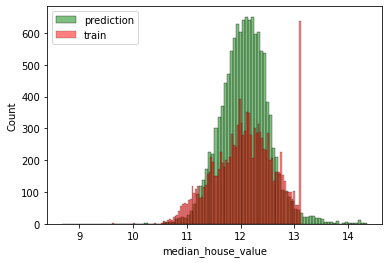

In [107]:
sns.histplot(y_pred, color='green', bins=100, alpha =.5, label='prediction') 
sns.histplot(y_train, color='red', bins=100, alpha =.5, label='train')
plt.legend()
plt.show()

## RMSE (Root Mean Squared Error)

In [99]:
def rmse(y_train, y_pred):
    error = y_train - y_pred
    se = error ** 2 
    mse = se.mean()
    return np.sqrt(mse)
    

In [108]:
rmse(y_pred=y_pred, y_train=y_train)

0.3413985918279915

In [82]:
m=len(y_pred)
np.sqrt(1/m * np.sum((y_pred-y_train)**2))

0.3413985918279915